SALES PREDICTION USING PYTHON

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv("/content/Advertising (2).csv")
df.shape

(200, 5)

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe(

)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
drop_col=['Unnamed: 0']
dataset.drop(drop_col,inplace=True,axis=1)

In [ ]:
dataset.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: title={'center': 'PLOT FOR TV'}, xlabel='TV', ylabel='Count'>

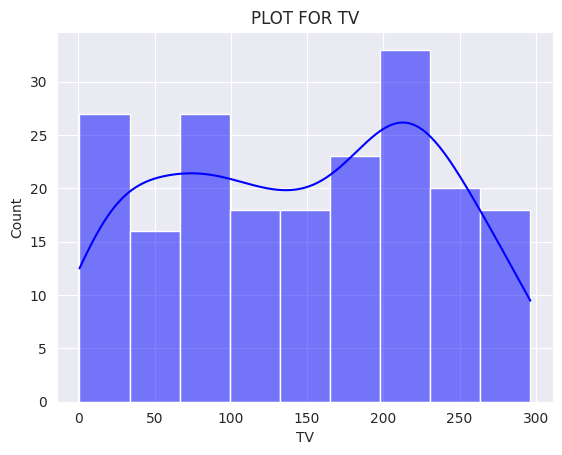

In [ ]:
sns.set_style("darkgrid")
plt.title("PLOT FOR TV")
sns.histplot(dataset["TV"],color="blue",kde=True)

<Axes: title={'center': 'PLOT FOR Radio'}, xlabel='Radio', ylabel='Count'>

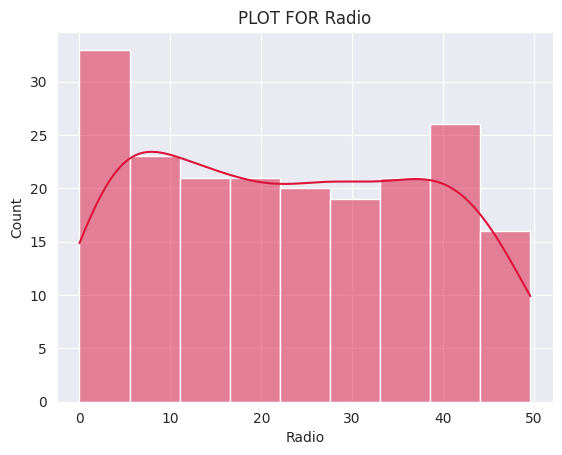

In [ ]:
sns.set_style("darkgrid")
plt.title("PLOT FOR Radio")
sns.histplot(dataset["Radio"],color="crimson",kde=True)

<Axes: title={'center': 'PLOT FOR Newspaper'}, xlabel='Newspaper', ylabel='Count'>

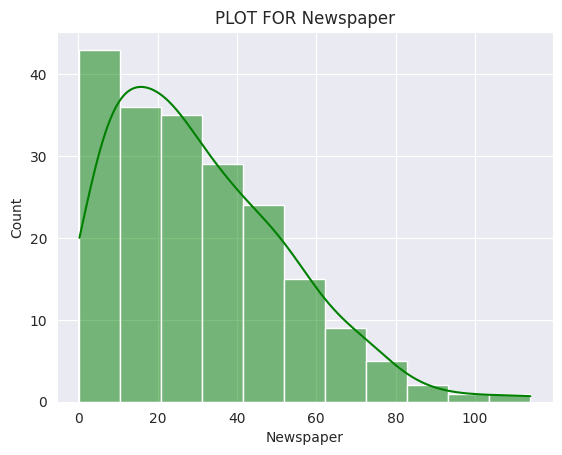

In [ ]:
sns.set_style("darkgrid")
plt.title("PLOT FOR Newspaper")
sns.histplot(dataset["Newspaper"],color="green",kde=True)

<Axes: title={'center': 'PLOT FOR Sales'}, xlabel='Sales', ylabel='Count'>

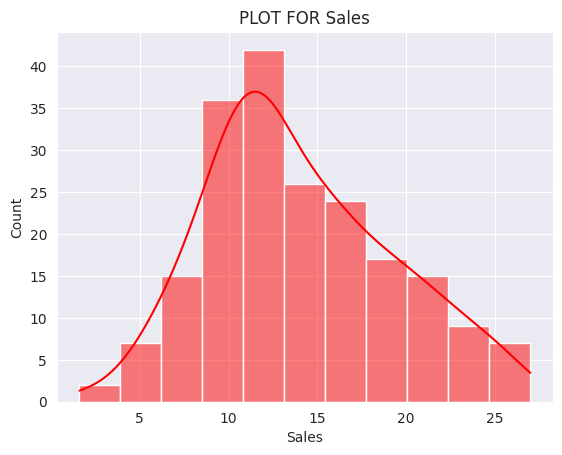

In [ ]:
sns.set_style("darkgrid")
plt.title("PLOT FOR Sales")
sns.histplot(dataset["Sales"],color="red",kde=True)

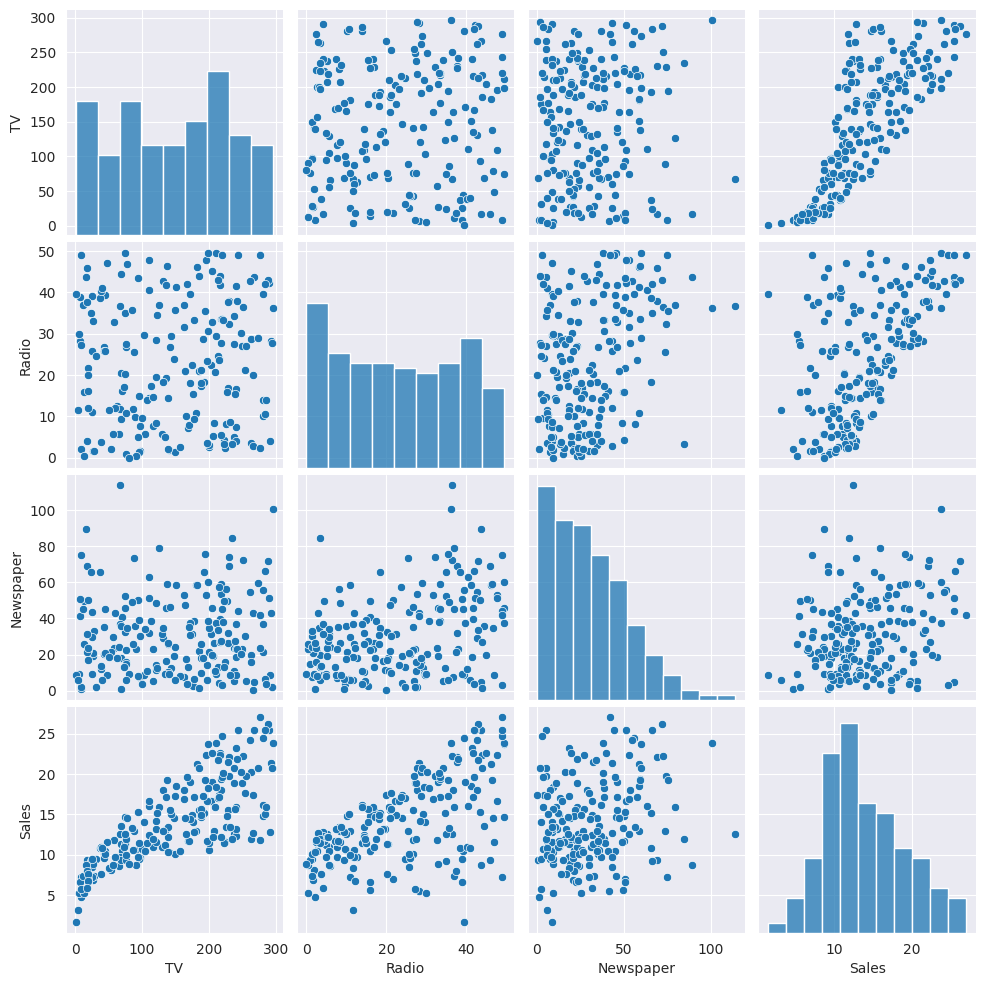

In [ ]:
sns.pairplot(data=dataset)

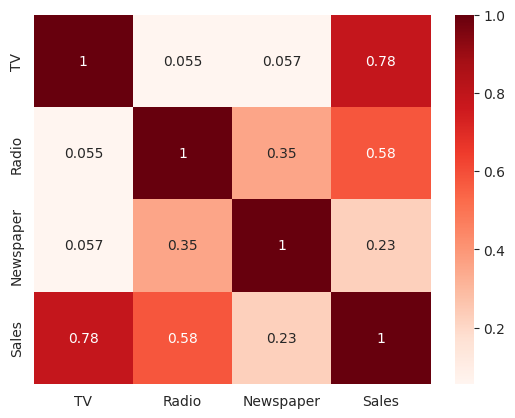

In [ ]:
sns.heatmap(dataset.corr(), annot=True, cmap='Reds')
plt.show()

In [ ]:
x=dataset[["TV","Radio","Newspaper"]]
y=dataset["Sales"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print("THE SHAPES ARE AS FOLLOW:")
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

THE SHAPES ARE AS FOLLOW:
(160, 3) (40, 3) (160,) (40,)


In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x)

In [ ]:
print("TESTING ACCCURACY AND LOSS")
print("acc: ",lr.score(x_test,y_test)*100)
print("loss: ",mean_squared_error(y,y_pred))

TESTING ACCCURACY AND LOSS
acc:  89.9438024100912
loss:  2.798923009260352


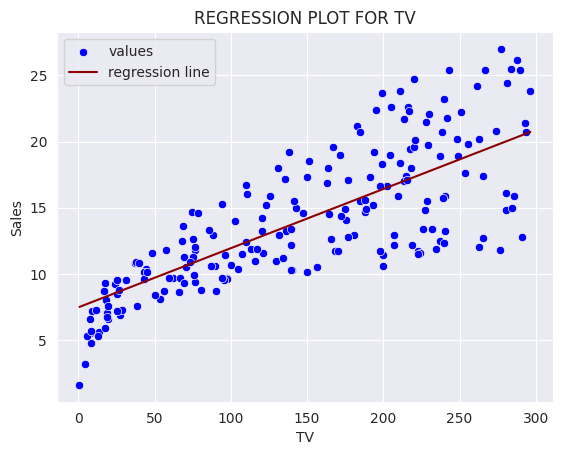

In [ ]:
tv_range = np.linspace(dataset["TV"].min(), dataset["TV"].max(), 100)
mean_radio = dataset["Radio"].mean()
mean_newspaper = dataset["Newspaper"].mean()
x_predict = pd.DataFrame({
    "TV": tv_range,
    "Radio": mean_radio,
    "Newspaper": mean_newspaper
})

y_predict = lr.predict(x_predict)

plt.title("REGRESSION PLOT FOR TV")
sns.set_style("darkgrid")
sns.scatterplot(data=dataset, x="TV", y="Sales",color="blue")

plt.plot(tv_range, y_predict, color="darkred")
plt.legend(["values","regression line"])
plt.show()

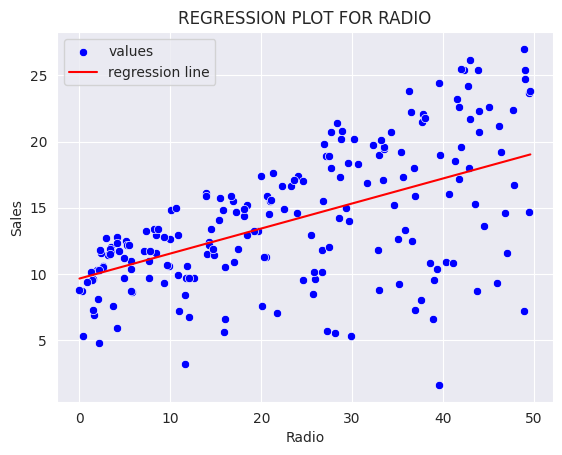

In [ ]:
radio_range = np.linspace(dataset["Radio"].min(), dataset["Radio"].max(), 100)
mean_tv = dataset["TV"].mean()
mean_newspaper = dataset["Newspaper"].mean()
x_predict = pd.DataFrame({
    "TV": mean_tv,
    "Radio": radio_range,
    "Newspaper": mean_newspaper
})

y_predict = lr.predict(x_predict)

plt.title("REGRESSION PLOT FOR RADIO")
sns.set_style("darkgrid")
sns.scatterplot(data=dataset, x="Radio", y="Sales",color="blue")

plt.plot(radio_range, y_predict, color="red")
plt.legend(["values","regression line"])
plt.show()

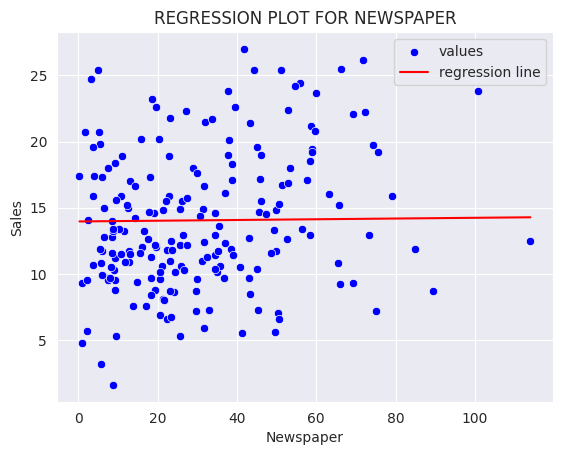

In [ ]:
newspaper_range = np.linspace(dataset["Newspaper"].min(), dataset["Newspaper"].max(), 100)
mean_tv = dataset["TV"].mean()
mean_radio = dataset["Radio"].mean()
x_predict = pd.DataFrame({
    "TV": mean_tv,
    "Radio": mean_radio,
    "Newspaper": newspaper_range
})

y_predict = lr.predict(x_predict)

plt.title("REGRESSION PLOT FOR NEWSPAPER")
sns.set_style("darkgrid")
sns.scatterplot(data=dataset, x="Newspaper", y="Sales",color="blue")

plt.plot(newspaper_range, y_predict, color="red")
plt.legend(["values","regression line"])
plt.show()